# End-to-end Multi-class Dog Breed Classification

## 1. Problem


Identifying the breed of a dog given an image of a dog.

## 2. Data


https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation


Evaluation is a file with probabilities for each dog breed of each test image.

## 4. Features

* Unstructured data
* 120 dog breeds (120 classes)
* 10,000+ images in training and test sets, no labels

In [1]:
import pandas as pd
import numpy as np

In [ ]:
# !pip install tensorflow_hub

#Getting our workspace ready`

In [2]:
# Importing TensorFlow
import tensorflow as tf
print('TF version: ', tf.__version__)

TF version:  2.17.0


In [3]:
# Import necessary tools
import tensorflow_hub as hub
print('TF Hub Version: ', hub.__version__)

# Check for GPU availability
tf.config.list_physical_devices('GPU')

TF Hub Version:  0.16.1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

## Getting our data ready (turning it into Tensors)

Let's start with labels

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
!unzip 'drive/MyDrive/Dog Vision/dog-breed-identification.zip' -d 'drive/MyDrive/Dog Vision'

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: drive/MyDrive/Dog Vision/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83fad0718581a696132c96c166472627.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: drive/MyDrive/Dog Vision/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: drive/

In [42]:
import pandas as pd
labels_csv = pd.read_csv('drive/MyDrive/Dog Vision/labels.csv')
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

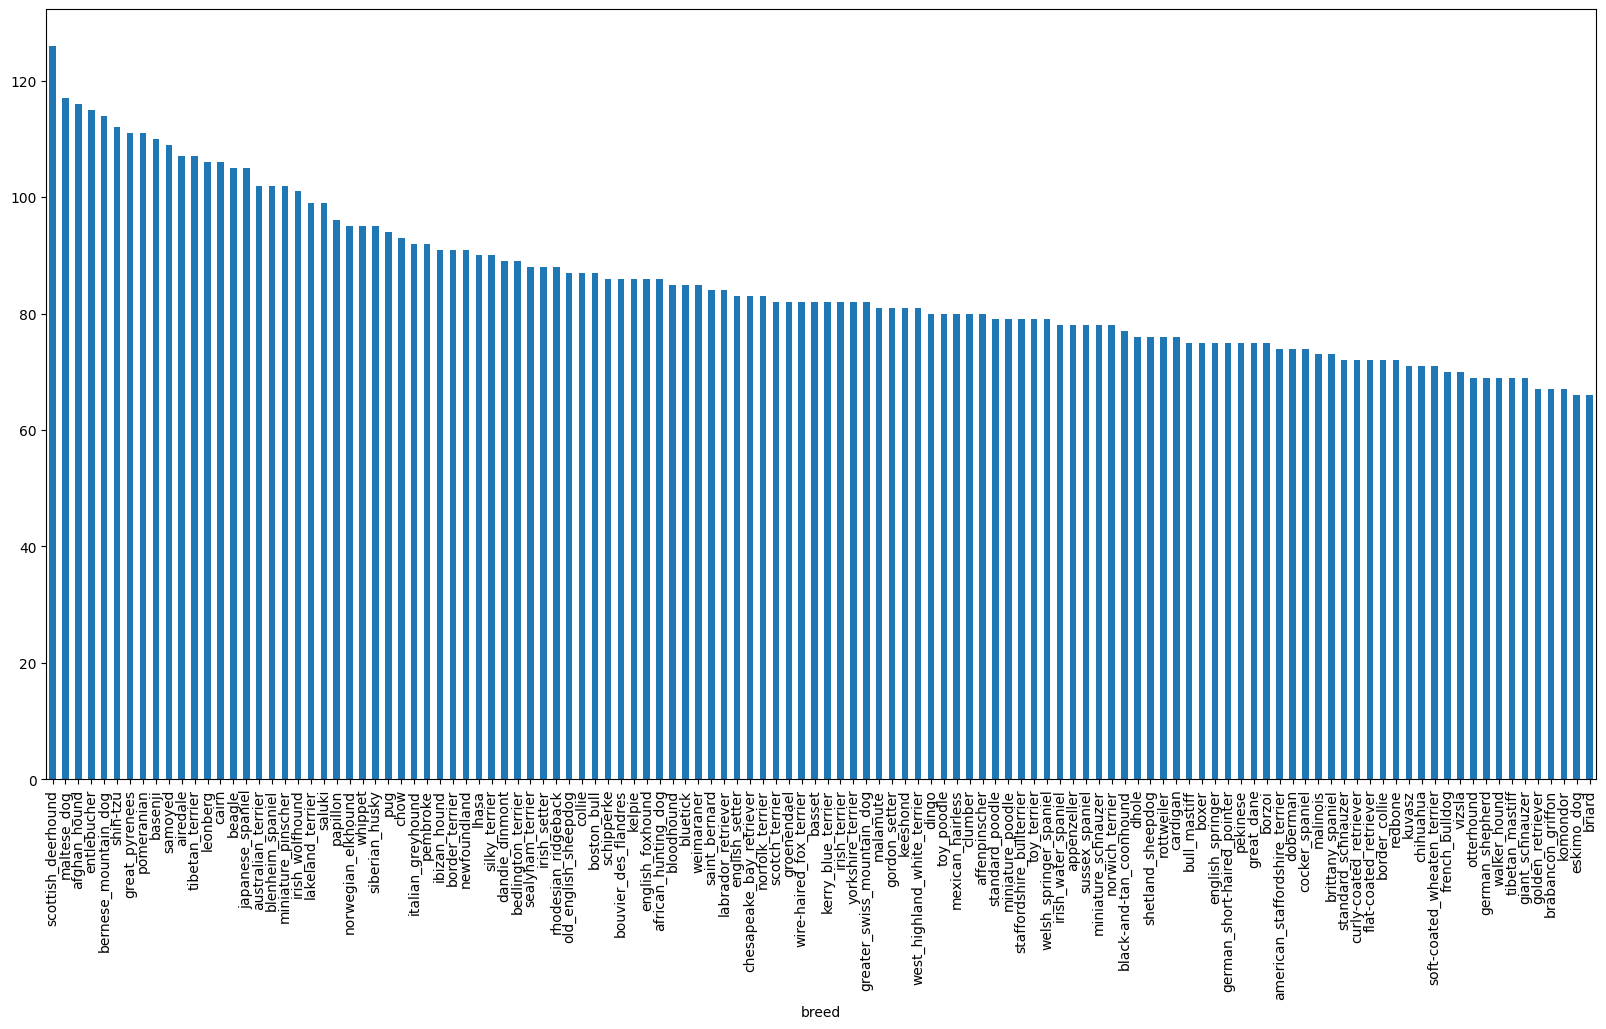

In [7]:
# How many images are there of each breed?
labels_csv.breed.value_counts().plot.bar(figsize=(20, 10))

In [12]:
# Let's view an image
from IPython.display import Image
# Image('drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

### Getting images and their labels
Let's get a list of all of our image file pathnames

In [43]:
filenames = ['drive/MyDrive/Dog Vision/train/' + fname + '.jpg' for fname in labels_csv['id']]


In [ ]:
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [44]:
 # Check whether number of filenames matches number of actual files
 import os
 if len(os.listdir('drive/MyDrive/Dog Vision/train')) == len(filenames):
  print("Filenames match actual amount of file")
 else:
  print('Doesnt match')

Filenames match actual amount of file


In [45]:
len(os.listdir('drive/MyDrive/Dog Vision/train'))

10222

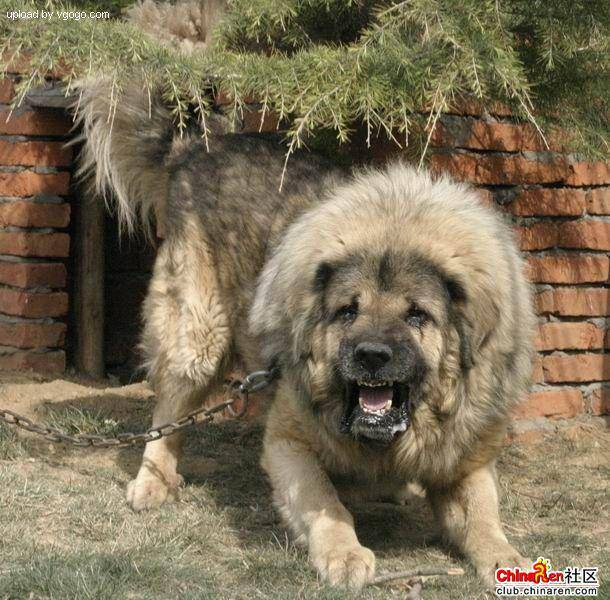

In [ ]:
Image(filenames[9000])

In [46]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels) #does the same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [47]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print('Filenames match actual amount of files')
else:
  print('Doesnt match')

Filenames match actual amount of files


In [48]:
# Unique features
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [49]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [15]:
len(boolean_labels)

10222

In [ ]:
print(labels[0]) #original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in a boolean array
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set


In [50]:
# Setup X and y variables
X = filenames
y = boolean_labels

We are going to start off experimenting with ~1000 images and increase as needed

In [51]:
# Set the number of images to use for experimenting
NUM_IMAGES = 1000 #@param{type:'slider', min:1000, max:10000, step:100}

In [52]:
# Let's split our data into train and validation of total size NUM_IMAGES
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

## Preprocessing images (turning them into Tensors)
we are goint to write a function:
1. Take an  filepath
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn our `image` into Tensors
4. Normalize our image (convert color channels from 0-255 to 0-1)
5. Resize the `image` to be a simagehape of (224, 224)
6. Return the modified `image`

In [53]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [54]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [55]:
IMG_SIZE = 224

#Create a function for image preprocessing
def process_image(image_path, img_size=IMG_SIZE):
  '''
  Takes an image filepath and turns the image into tensor
  '''
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into a Tensor with three color channels(RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

Trying to process all 10,000+ images in one go may not fit into memory. That's why we are doing about 32 at a time (batch size = 32)

In order to use TensrFlow effectively, we need our data in form of TF tuples which look like this:
`(image, label)`.

In [56]:
# A function which returns a tuple (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

A function which turns all of our data (`X` & `y`) into batches

In [57]:
# Define batch size
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Create batches of data out of image(X) and label(y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data (no labels)
  '''
  # If test data - no labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths, no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If validation data - no shuffling
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),   # filepaths
                                               tf.constant(y)))  # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # If training batch
  else:
    print('Creating training data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),   # filepaths
                                               tf.constant(y)))  # labels
    # Shuffling pathnames and labels is faster, than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Creating (image, label) tuple
    data = data.map(get_image_label)

    # Turning into a batch
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [58]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [59]:
# Let's check different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [60]:
import matplotlib.pyplot as plt
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  '''
  Displays a plot from 25 images and their labels from a data batch
  '''
  # Setup the figure
  plt.figure(figsize=(10, 10))

  # Loop through 25
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as a title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')

In [61]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

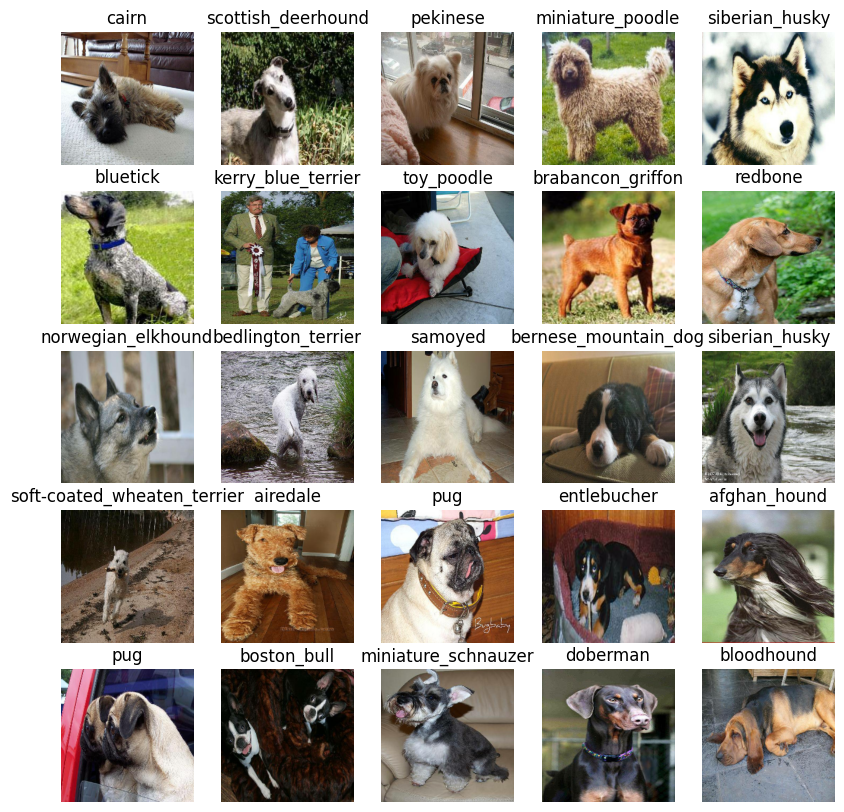

In [ ]:
show_25_images(train_images, train_labels)

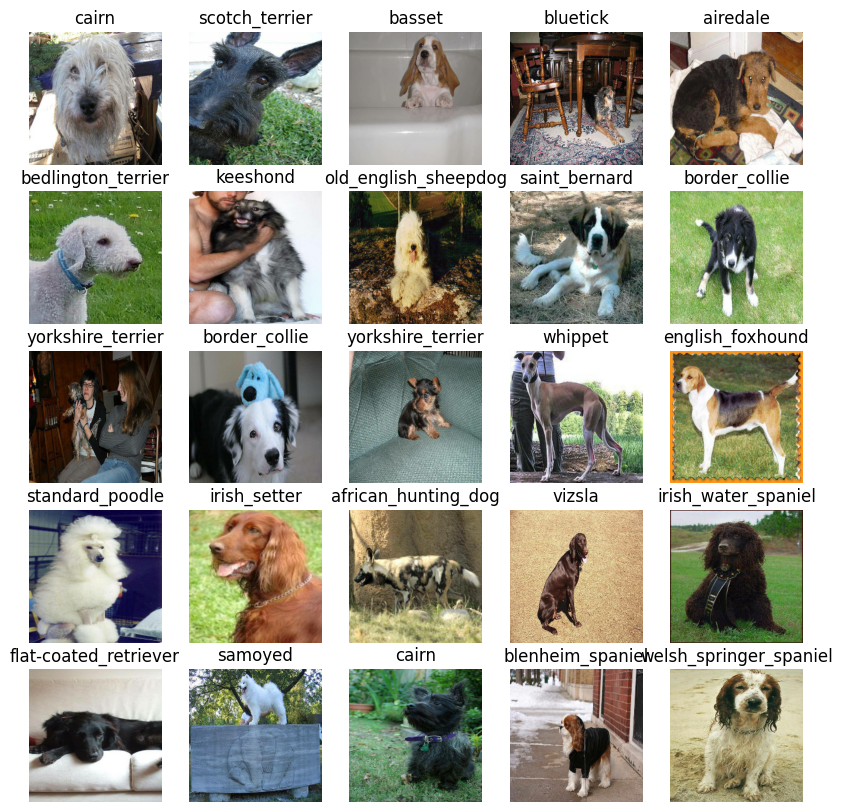

In [28]:
# Now let's visualize the validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

We are going to use transfer learning
* The input shape to our model
* The output shape (image labels, in the form of Tensors) of our model
* The URL of the model we want to use

In [62]:
# Setup input and output shapes to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

Creating a function which:
* Takes in an input shape, output shape and the model we've chosen as parameters
* Defines the layers in Keras model in a sequential fashion
* Compiles the model
* Builds a the model (tell the model the input shpae it will be getting)
* Returns the model

All of these steps an be found here: https://www.tensorflow.org/guide/keras/sequential_model

In [30]:
## Creating a function
# def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
#   print('Building model with: ', MODEL_URL)

#   # Setup the model layers
#   model = tf.keras.Sequential([
    # hub.KerasLayer(MODEL_URL), ## layer 1 (input layer) ### THE PROBLEM IS HERE
    # tf.keras.layers.Dense(units=OUTPUT_SHAPE,
    #                       activation='softmax')  ## layer 2 (output layer )
#])
#   # Compile the model
#   model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['accuracy']
#                 )
#   model.build(INPUT_SHAPE)
#   return model

# model=create_model()
# model.summary()

Building model with: https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7b0106290f40> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [109]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print('Building model with: ', model_url)

    # Setup the Sequential model layers
    model = tf.keras.Sequential([
        # Wrap KerasLayer in a Lambda layer
        tf.keras.layers.Lambda(lambda x: hub.KerasLayer(model_url, trainable=False)(x), input_shape=input_shape),
        # Add a Dense output layer
        tf.keras.layers.Dense(units=output_shape, activation='softmax')
    ])

    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )
    model.build
    return model

model = create_model(INPUT_SHAPE, OUTPUT_SHAPE, MODEL_URL)
model.summary()

Building model with:  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Sequential model 'sequential_12' has already been configured to use input shape (None, 224, 224, 3). You cannot build it with input_shape (224, 224, 3)

## Creating callbacks

Callbacks are helper functions a model can use during training to save its progress, check its progress or stop training early if a model stops improving

We'll create 2 callbacks:
one for TensorBoard to track our models progress, another for early stopping

### TensorBoard Callback
1. Load the TB notebook extension
2. Create a TB callback which is able to save logs to a directory and pass it to our model's `fit()` function
3. Visualize our model's training logs with `%tensorboard` magic function

In [31]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [67]:
import datetime

# Create a function to built a TensorBoard callback
def create_tensorboad_callback():
  # create a log directory for log storing
  logdir = os.path.join('drive/MyDrive/Dog Vision/logs',
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S')) # make it so the logs get tracked whenever we run an experiment
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

Helps stop out model from overfittingby stopping training if certain eval metric stops improving

In [68]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training a model (on a subset of data)
Our first model is goiong to train on 1000 examples to make sure everything is working.

In [69]:
NUM_EPOCHS = 100 #@param {type:'slider', min:10, max:100, step:10}

In [ ]:
print("GPU", 'available' if tf.config.list_physical_devices('GPU') else 'not available')

GPU available


Create a function which trains a model

* Create a model using `create_model()`
* SetUp a TensorBoard callback using `create_tensorboaed_callback()`
* Call the `fit()` passing it the training data, validation data, the number of epochs to train for and the callbacks
* Return the model

In [70]:
# Build a fuction to train a return a trained model
def train_model():
  '''
  Trains a given model returns the trained version
  '''
  model = create_model()

  # Create a new TensorBoard session every time we train a model
  tensorboard = create_tensorboad_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [103]:
model = train_model()

Building model with:  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 410ms/step - accuracy: 0.0415 - loss: 5.1643 - val_accuracy: 0.2550 - val_loss: 3.4818
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 264ms/step - accuracy: 0.6504 - loss: 1.9474 - val_accuracy: 0.5450 - val_loss: 2.1380
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.9272 - loss: 0.6604 - val_accuracy: 0.6350 - val_loss: 1.6084


In [ ]:
#Looks like our model is overfitting, which is good for start because it means the model is learning

In [74]:
model.save_weights('drive/My Drive/Dog Vision/models/model_weights.weights.h5')

### Checking the TensorBoard logs

`%tensorboard` will access the logs directiory and visualize its contents

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

UsageError: Line magic function `%tensorboard` not found.


## Making and evaluating predictions using a trained model

In [75]:
# Make predictions of validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 762ms/step


array([[2.9539010e-03, 6.6442713e-05, 2.4787337e-03, ..., 1.6481406e-04,
        5.8886541e-05, 2.4173076e-03],
       [2.6396717e-04, 2.4216833e-05, 1.0402517e-03, ..., 1.1722613e-04,
        4.6284092e-04, 3.9251270e-05],
       [9.3522794e-06, 4.0660769e-05, 7.4752052e-06, ..., 5.4446613e-05,
        1.1729693e-05, 3.9701595e-04],
       ...,
       [2.3719322e-06, 4.9650571e-06, 1.2858766e-05, ..., 8.2054447e-07,
        6.6906490e-05, 5.8462600e-05],
       [3.3425447e-03, 1.7543804e-04, 9.2298615e-05, ..., 1.3924864e-04,
        9.7937746e-06, 1.9666306e-03],
       [3.4296317e-03, 5.1163734e-05, 4.5894780e-03, ..., 2.1611168e-03,
        8.0558349e-04, 2.8836759e-04]], dtype=float32)

In [76]:
predictions.shape

(200, 120)

In [77]:
np.max(predictions[0])

0.29027063

In [ ]:
# First prediction
index = 42
# print(predictions[index])
print(f'Max value (probability of prediction): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predicted value: {unique_breeds[np.argmax(predictions[index])]}')

Max value (probability of prediction): 0.7044908404350281
Sum: 1.0000001192092896
Max index: 113
Predicted value: walker_hound


We want to be able to use the functionality of our model at scale and also we want to see what image the prediction is being made on

**Note**: prediction probabilities are also known as confidence levels

In [78]:
# Turn prediciton probabilities into their respective label
def get_pred_label(prediction_probabilities):
  '''
  Turn an array of prediction porbabilities into a label
  '''
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predictied label based on an array of pred probs
pred_label = get_pred_label(predictions[81])
pred_label

'brittany_spaniel'

Since our validation data is still in a batch form, we will have to unbatchify it to make predictions and then compare those predictions to the prediction truth labels

In [79]:
# Create a functino to unbatch a batch dataset
def unbatchify(data):
  '''
  Takes a batched dataset of (image, label) Tensors and returns separate arrays on images and labels
  '''
  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

# Unbatchify the validation dataset
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Making function which:
* Takes an array of prediction probabilities, an array of truth  labels and an array of images and an integer: ✅
* Convert the prediction probabilities to predictied label: ✅
* Plot the predictied label, it predicted probability, the truth label and the target image on a single plot ✅


In [80]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  '''
  View the prediction, ground truth and image for sample n
  '''
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
  # Change plot title
  plt.title('{} {:2.0f}% {}'.format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color)

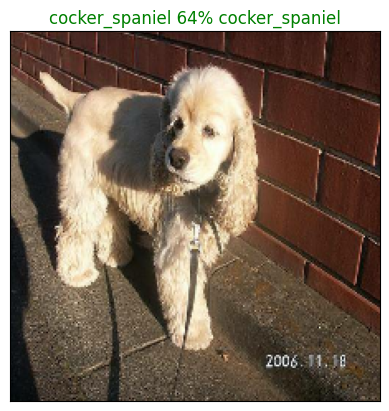

In [81]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=131)

Makeing a function to view our model top 10 preditions

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Pred probs indexes
  * Pred probs values
  * Prediction labels
* Plot the top 10 pred probs values and labels, coloring the true label green

In [82]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  '''
  Plus the top 10 highest predictino confidences along with truth label for sample n
  '''
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Top 10 predicion confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup Plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')

  # Change the color of True label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

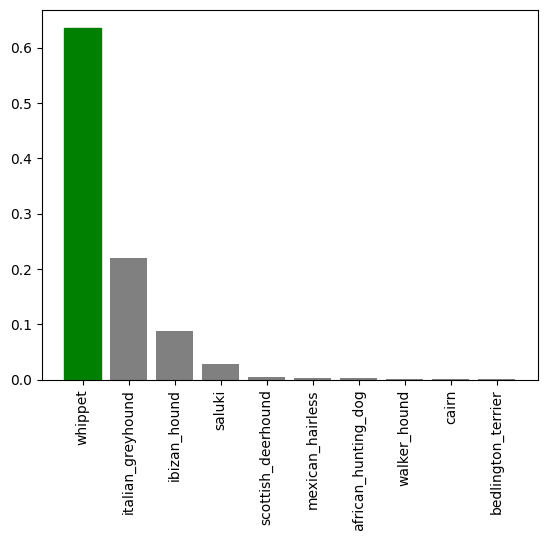

In [83]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=13)

Let's combine images of predicted breed vs actual breed and prediction confidences

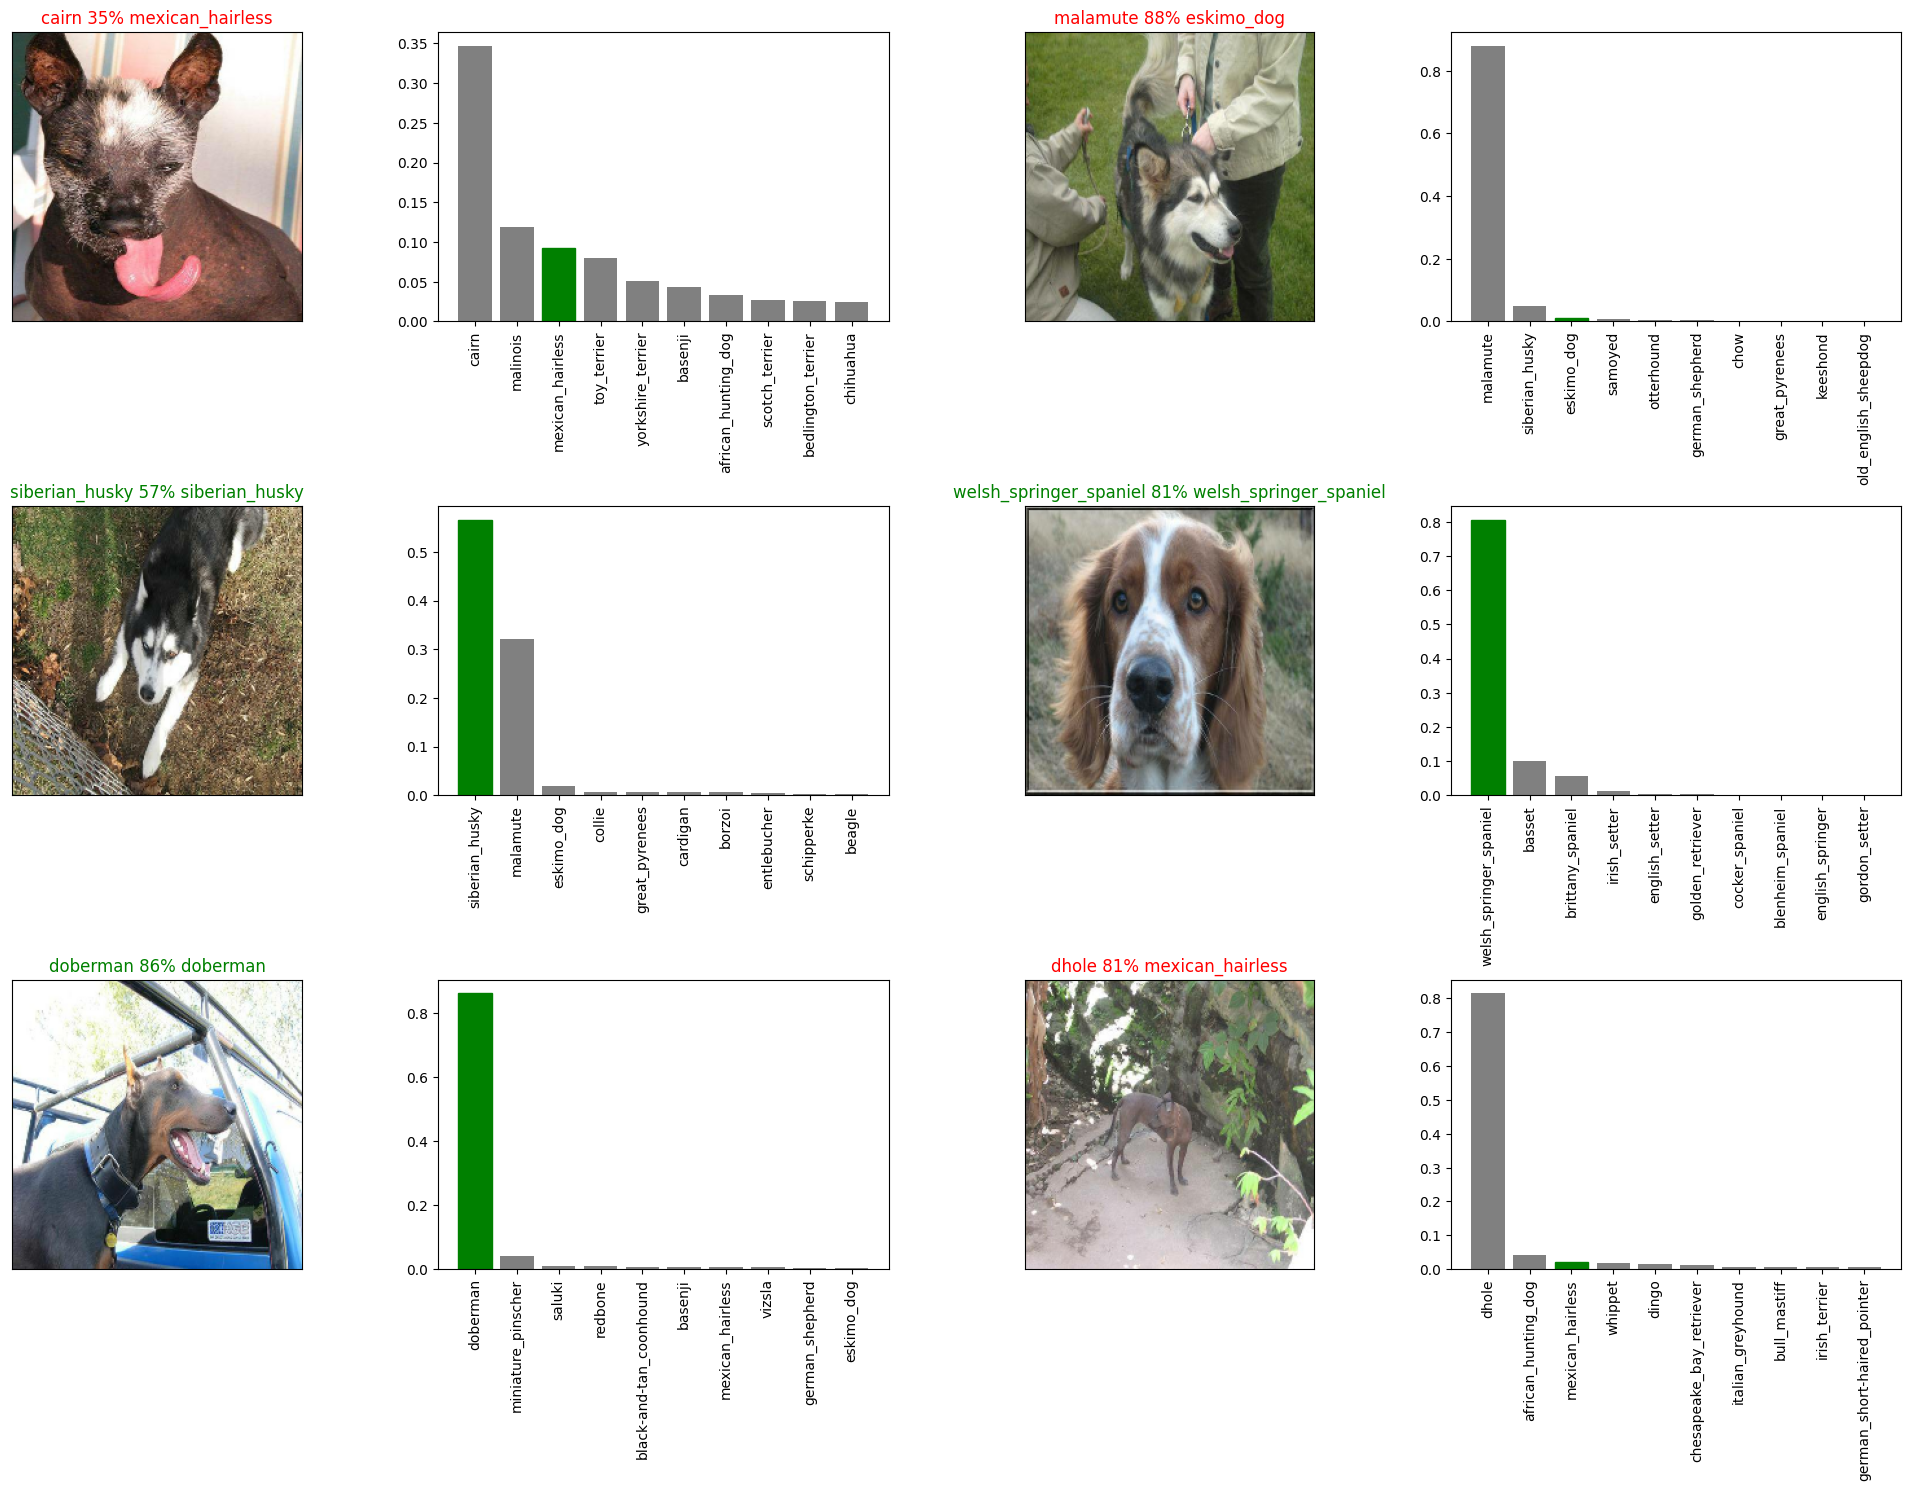

In [94]:
i_multiplier = 33
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving a reloading a trained model

In [97]:
# Create a function to save a model
def save_model(model, suffix=None):
  '''
  Saves a given model on a model's directory and appends a suffix (string)
  '''
  # Create a model directory pathname with current time
  modeldir = os.path.join('drive/My Drive/Dog Vision/models',
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%w"))
  model_path = modeldir + '-' + suffix + '.h5' #save format
  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  model.save_weights('drive/My Drive/Dog Vision/models/model_weights.weights.h5')
  return model_path

In [86]:
# Create a function to load a trained model
def load_model(model_path):
  '''
  Loads a saved model from a specified path
  '''
  print(f'Loading saved model from: {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer':hub.KerasLayer}, safe_mode=False)
  return model

In [98]:
# Save our model trained on 1000 images
save_model(model, suffix='1000-images-mobilenetv2-Adam')

Saving model to: drive/My Drive/Dog Vision/models/20241010-07514-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20241010-07514-1000-images-mobilenetv2-Adam.h5'

In [104]:
# Evaluate the pre_saved model
model.evaluate(val_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.6429 - loss: 1.5536


[1.6083506345748901, 0.6349999904632568]

## Training a big dog model (on the full data)

In [ ]:
len(X), len(y)

In [106]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [107]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [108]:
# Create a model for full data
full_model = create_model()

Building model with:  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [110]:
# Create full model callbacks
full_model_tensorboard = create_tensorboad_callback()
# No validation set when training on the full data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

## **Running the cell below will take a while**

In [111]:
# Fit the full model to the full data
full_model.fit(x=full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_tensorboard,
                         full_model_early_stopping])

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 65s 156ms/step - accuracy: 0.4827 - loss: 2.3702
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 46s 144ms/step - accuracy: 0.8996 - loss: 0.3762
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 45s 142ms/step - accuracy: 0.9409 - loss: 0.2265
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 81s 140ms/step - accuracy: 0.9659 - loss: 0.1448
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 84s 145ms/step - accuracy: 0.9824 - loss: 0.0964
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 83s 149ms/step - accuracy: 0.9923 - loss: 0.0682
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 82s 148ms/step - accuracy: 0.9937 - loss: 0.0548
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 80s 141ms/step - accuracy: 0.9956 - loss: 0.0403
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 83s 144ms/step - accuracy: 0.9974 - loss: 0.0347
Epoch 10/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 81s 143ms/step - accuracy: 0.9979 - loss: 0.0289
Epoch 11/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 45s 141ms/step - accuracy: 0.9978 - loss: 0.0237
Epoch 12

In [112]:
save_model(full_model, suffix='full-image-set-mobilev2-Adam')

Saving model to: drive/My Drive/Dog Vision/models/20241010-08284-full-image-set-mobilev2-Adam.h5...


'drive/My Drive/Dog Vision/models/20241010-08284-full-image-set-mobilev2-Adam.h5'

In [113]:
model.save_weights('drive/My Drive/Dog Vision/models/full_model_weights.weights.h5')

## Making predicitons on the test dataset

In [115]:
# Load test image filenames
test_path = 'drive/MyDrive/Dog Vision/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/fd5673662a27a76094205ec40cbb5b5d.jpg',
 'drive/MyDrive/Dog Vision/test/fc7870edf256498d5876033baf56fbe5.jpg',
 'drive/MyDrive/Dog Vision/test/fc7576b5d6dcd4b07580a8b692222787.jpg',
 'drive/MyDrive/Dog Vision/test/fc774c01a474039d7fb7e53019997f4b.jpg',
 'drive/MyDrive/Dog Vision/test/fc7c34b64c3dc982db60e50b656983fc.jpg',
 'drive/MyDrive/Dog Vision/test/fc5dd147bc719dedca53f20ece5ee037.jpg',
 'drive/MyDrive/Dog Vision/test/fc5889bad0b8076465d96960a1add15a.jpg',
 'drive/MyDrive/Dog Vision/test/fc5628535ed7e4e285796b2a43778fcf.jpg',
 'drive/MyDrive/Dog Vision/test/fb814a21b0f5f627c93b7762ec7aa593.jpg',
 'drive/MyDrive/Dog Vision/test/fb8314da87c341c9845fa2cfe87fbf7f.jpg']

In [117]:
# Create test databatch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [118]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

Calling `predict` on the full model and passing it the test data batch will take a long time to run (about an hour)

In [119]:
# Make predictions on test data using the full model
test_predictions = full_model.predict(test_data,
                                      verbose=1)

324/324 ━━━━━━━━━━━━━━━━━━━━ 53s 145ms/step


In [120]:
np.savetxt('drive/MyDrive/Dog Vision/preds_array.csv', test_predictions, delimiter=',')

In [122]:
test_predictions = np.loadtxt('drive/MyDrive/Dog Vision/preds_array.csv', delimiter=',')

In [125]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle submission

It wants our model's prediction probabilities outputs in a DataFrame with an ID and a column for each different dog breed

To get the data in the required format we will:
* Create a pandas DF with an ID column as well as a column for each dog breed.
* Add data to the ID columns by extracting test image ID's from the filepaths.
* Add data (prediction probabilities) to each of the dog breed columns.
* Export the DF as csv to submit it to Kaggle.

In [126]:
preds_df = pd.DataFrame(columns=['id'] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [129]:
# Append test image ID's to prediction DF
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id'] = test_ids

In [130]:
preds_df.head()

id affenpinscher afghan_hound  \
0  fd5673662a27a76094205ec40cbb5b5d           NaN          NaN   
1  fc7870edf256498d5876033baf56fbe5           NaN          NaN   
2  fc7576b5d6dcd4b07580a8b692222787           NaN          NaN   
3  fc774c01a474039d7fb7e53019997f4b           NaN          NaN   
4  fc7c34b64c3dc982db60e50b656983fc           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [131]:
# Add the prediction probs  to each dog breeds
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  fd5673662a27a76094205ec40cbb5b5d   8.742566e-07  3.914318e-08   
1  fc7870edf256498d5876033baf56fbe5   3.345859e-10  1.665758e-07   
2  fc7576b5d6dcd4b07580a8b692222787   5.019312e-14  4.157572e-13   
3  fc774c01a474039d7fb7e53019997f4b   2.657710e-12  6.030124e-10   
4  fc7c34b64c3dc982db60e50b656983fc   2.106936e-09  1.022848e-10   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.771276e-09  1.799832e-09                    1.668268e-05   
1         1.597936e-08  2.170134e-06                    3.837536e-08   
2         2.742666e-14  4.227631e-09                    1.464057e-12   
3         3.055039e-13  1.272410e-10                    2.214419e-10   
4         4.056567e-08  4.430253e-08                    2.502291e-04   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.503564e-11        5.267009e-08  1.299265e-08  3.185152e-09  ...   
1  1.179055e-05        2.925972e-08  6.211442e-10  2.147831e-08  ...   
2  8.009186e-15        8.373886e-15  7.861061e-12  6.504357e-12  ...   
3  3.497848e-12        1.048833e-13  5.667943e-14  3.644751e-11  ...   
4  9.084197e-02        1.853158e-07  1.066924e-04  4.067311e-07  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.607381e-03  1.935990e-09  4.560103e-08  1.249741e-08  6.587221e-08   
1  3.924981e-09  1.948635e-07  1.991601e-05  8.506598e-07  3.896787e-08   
2  3.637387e-11  8.367213e-15  2.974621e-14  6.256635e-12  8.731071e-13   
3  2.770902e-12  4.352117e-14  9.756667e-15  2.116745e-09  2.374189e-10   
4  6.142045e-06  5.815554e-06  5.464698e-08  1.702648e-07  4.957761e-07   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            3.264712e-09                 2.725399e-08  3.564163e-12   
1            1.523494e-08                 3.056840e-07  8.184097e-08   
2            6.261065e-15                 7.001734e-10  4.947789e-13   
3            8.808281e-11                 1.977478e-11  6.371184e-13   
4            1.277451e-05                 9.730878e-07  4.887262e-07   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.907081e-09       1.126616e-07  
1             1.218782e-08       9.419114e-09  
2             1.861725e-08       1.647949e-13  
3             1.266455e-12       1.018492e-14  
4             3.549250e-07       4.854207e-07  

[5 rows x 121 columns]

In [133]:
# Save our predictions csv
preds_df.to_csv('drive/MyDrive/Dog Vision/Full-model-prediction-submissions-1_mobilenetV2.csv',
                index=False)

## Making predictions on custom images

To make predictions on custom images, we will:
* Get the filenames of our own images
* Convert them into data batches (`test_data` param=True (no labels))
* Pass the custom image to the model and `.predict()`
* Convert prediction to the labels
* Compare the predictions to custom images

In [138]:
custom_path = 'drive/MyDrive/Dog Vision/Custom-images/'

In [148]:
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [149]:
custom_image_paths

['drive/MyDrive/Dog Vision/Custom-images/Pes1.jpeg',
 'drive/MyDrive/Dog Vision/Custom-images/Pes3.jpeg',
 'drive/MyDrive/Dog Vision/Custom-images/Pes2.jpeg',
 'drive/MyDrive/Dog Vision/Custom-images/Kilttijpg.jpg',
 'drive/MyDrive/Dog Vision/Custom-images/Kiltti2.jpg']

In [150]:
# Turn custom images into batch set
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [151]:
# Make predictions on the custom data
custom_preds = full_model.predict(custom_data)
custom_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[8.16027801e-12, 3.30728833e-10, 1.76641290e-09, 6.56863097e-09,
        6.08985388e-12, 2.93484785e-11, 4.35818741e-08, 1.90533596e-11,
        3.27864645e-11, 1.99516945e-10, 4.69143691e-12, 1.44805934e-09,
        3.21193716e-09, 1.46124876e-10, 2.64428692e-08, 1.25858240e-10,
        7.33417522e-08, 1.78597830e-08, 4.70400652e-09, 5.58303237e-10,
        7.92374555e-10, 3.39365785e-10, 3.76029563e-09, 2.67165294e-08,
        1.98905573e-10, 4.01328498e-10, 4.57732879e-11, 2.60824642e-08,
        1.74871125e-11, 4.31401720e-11, 1.10699028e-09, 3.04140428e-11,
        4.49288037e-11, 2.21200711e-08, 1.32890643e-11, 3.95015326e-10,
        6.88978048e-08, 7.12273618e-08, 1.00680069e-08, 3.90401114e-11,
        9.03571037e-11, 2.40692514e-12, 5.31543087e-10, 1.78311851e-07,
        1.01333837e-10, 4.16330792e-09, 9.99997258e-01, 4.18617831e-12,
        1.17755306e-10, 1.75979352e-07, 4.06336076e-09, 2.50620968e-10,
        4.88973917e-10, 3.53378965e-10, 1.79511748e-08, 7.094716

In [152]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['german_shepherd',
 'american_staffordshire_terrier',
 'golden_retriever',
 'collie',
 'collie']

In [153]:
# Get custom images (unbatchify() won't work without labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

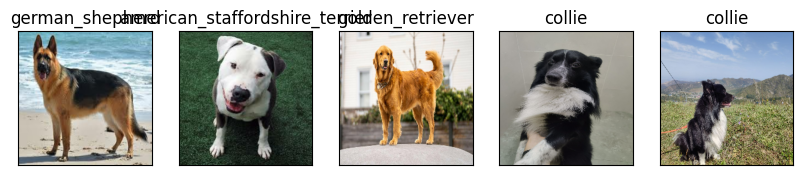

In [158]:
# Check custom image predictions
plt.figure (figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)